# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Requirements" data-toc-modified-id="Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements</a></div><div class="lev1 toc-item"><a href="#Retrieve-data" data-toc-modified-id="Retrieve-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Retrieve data</a></div><div class="lev1 toc-item"><a href="#Calling-a-R-package-method" data-toc-modified-id="Calling-a-R-package-method-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calling a R package method</a></div><div class="lev1 toc-item"><a href="#Retrieving-R-plot" data-toc-modified-id="Retrieving-R-plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Retrieving R plot</a></div>

_Damien Delforge (UCLouvain) - damien.delforge@uclouvain.be, October 2018_

# Introduction

Since R is a popular programming language in science, many scientific packages are published in R and it may take some times before viable alternatives become available in Python. Recoding a package in Python may be time-consuming and potentially harmful if some bugs or error remains undetected. It is also more convenient to refer in scientific paper to mature packages rather than explaining in detail unpublished code materials. Still, if the goal is to develop python alternative, being able to interact between R and Python is particularly handy for a testing purpose and to ensure that both R and Python methods provides the same results.

For these reasons, this tutorial shows how to call methods from a R package from a Python session. Only the basics are covered and more advanced topic can be found in the `rpy2`documentation.

# Requirements

Obviously, you need to have Python and R installed. If not, we recommend using [Anaconda](https://www.anaconda.com/download/) as it allows installing both programming language, provides a distribution of scientific packages and popular scientific IDE such as Spyder and RStudio. 

Within python, the package [`rpy2`](https://rpy2.readthedocs.io/en/version_2.8.x/) needs to be installed. 

For this example, we will interact with the package [`rEDM`](https://cran.r-project.org/web/packages/rEDM/index.html), a package for nonlinear time series analysis.

If everything is installed correctly, the following code cell containing all the necessary import should run:

In [1]:
import pandas as pd # to handle data
import numpy as np # numerical computation
import rpy2.robjects as robjects # allow interaction with the R session
from rpy2.robjects import pandas2ri, numpy2ri # converter for pandas dataframe
from rpy2.robjects.packages import importr # allow imports of R packages
import matplotlib.pyplot as plt # for plotting python charts
%matplotlib inline 
# -> allow displaying charts in a jupyter notebook

pandas2ri.activate() # activate automated conversion of pd.DataFrame into R dataframe
numpy2ri.activate() # activate automated conversion of numpy arrays into R arrays
rEDM = importr("rEDM")

# Retrieve data

This example will use the data provided within the rEDM package: a dataset about sardine, anchovy and sea surface temperature. To access this dataset, we need to call it from the R global environment by passing a R command with `robjects.r` and to convert it into a [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) object:

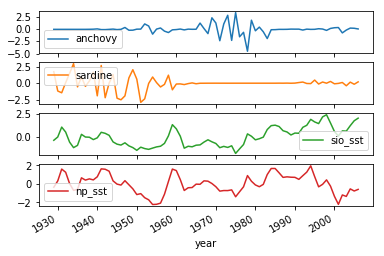

In [2]:
# we call the data in the R environment
robjects.r('data(sardine_anchovy_sst)')
# we retrieve the data from the R environment and convert it into a pd.DataFrame
df = pandas2ri.ri2py_dataframe(robjects.globalenv['sardine_anchovy_sst'])
df.set_index('year', inplace=True)
_ = df.plot(subplots=True)

# Calling a R package method

When calling a R method, python objects need to be converted into R objects. This is done automatically for pandas and numpy objects thanks to the commands `pandas2ri.activate()` and `numpi2ri.activate()` set in the beginning of the notebook. Conversely, R outputs needs to be converted back into python in order to be handled.

For instance, let us use the `rEDM.simplex` method on the pandas series `df['anchovy`]:

In [3]:
r_result = rEDM.simplex(df['anchovy'])
py_result = pandas2ri.ri2py_dataframe(r_result)
py_result

,E,tau,tp,nn,num_pred,rho,mae,rmse,perc,p_val,const_pred_num_pred,const_pred_rho,const_pred_mae,const_pred_rmse,const_pred_perc,const_p_val
1,1,1.0,1.0,2.0,77.0,0.338210,0.642123,1.103471,0.662338,0.001228,77.0,-0.328633,0.820346,1.640635,0.571429,0.998337
2,2,1.0,1.0,3.0,76.0,-0.048329,0.650374,1.184584,0.539474,0.660286,76.0,-0.328635,0.831114,1.651394,0.565789,0.998227
3,3,1.0,1.0,4.0,75.0,0.075989,0.577111,1.076599,0.586667,0.259130,75.0,-0.328636,0.842180,1.662366,0.560000,0.998110
4,4,1.0,1.0,5.0,74.0,0.074540,0.578761,1.074364,0.567568,0.264593,74.0,-0.328637,0.853560,1.673561,0.554054,0.997985
5,5,1.0,1.0,6.0,73.0,0.106453,0.561829,1.051894,0.657534,0.185652,73.0,-0.328638,0.865244,1.684985,0.547945,0.997852
6,6,1.0,1.0,7.0,72.0,0.109066,0.553597,1.047561,0.611111,0.181519,72.0,-0.328639,0.877237,1.696646,0.541667,0.997709
7,7,1.0,1.0,8.0,71.0,0.071012,0.563363,1.060147,0.577465,0.278747,71.0,-0.328641,0.889586,1.708552,0.535211,0.997557
8,8,1.0,1.0,9.0,70.0,0.069244,0.571165,1.064592,0.514286,0.285122,70.0,-0.328642,0.902263,1.720713,0.528571,0.997395
9,9,1.0,1.0,10.0,69.0,-0.061204,0.576593,1.095882,0.565217,0.690704,69.0,-0.328644,0.915335,1.733137,0.521739,0.997221
10,10,1.0,1.0,11.0,68.0,-0.057675,0.593463,1.100731,0.558824,0.679217,68.0,-0.328643,0.928635,1.745833,0.529412,0.997036


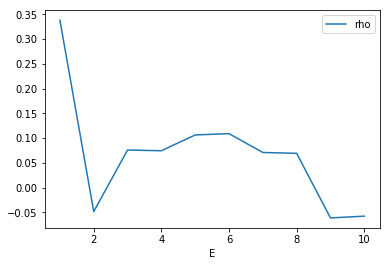

In [4]:
py_result.plot(x='E', y='rho')

Boolean types are also automatically handled. Other types needs to be converted explicitly such as python type `range` or `list`. You may convert numerical vector into numpy object or call a specific method for conversion such as: `robjects.StrVector`, `robjects.IntVector` or `robjects.FloatVector`.

For example, let us change the parameter 'E' within the simplex method to limit it to a 1 to 5 range:

In [5]:
E = robjects.IntVector(range(1,6))
r_result = rEDM.simplex(df['anchovy'], E=E)
py_result = pandas2ri.ri2py_dataframe(r_result)
py_result

,E,tau,tp,nn,num_pred,rho,mae,rmse,perc,p_val,const_pred_num_pred,const_pred_rho,const_pred_mae,const_pred_rmse,const_pred_perc,const_p_val
1,1,1.0,1.0,2.0,77.0,0.338210,0.642123,1.103471,0.662338,0.001228,77.0,-0.328633,0.820346,1.640635,0.571429,0.998337
2,2,1.0,1.0,3.0,76.0,-0.048329,0.650374,1.184584,0.539474,0.660286,76.0,-0.328635,0.831114,1.651394,0.565789,0.998227
3,3,1.0,1.0,4.0,75.0,0.075989,0.577111,1.076599,0.586667,0.259130,75.0,-0.328636,0.842180,1.662366,0.560000,0.998110
4,4,1.0,1.0,5.0,74.0,0.074540,0.578761,1.074364,0.567568,0.264593,74.0,-0.328637,0.853560,1.673561,0.554054,0.997985
5,5,1.0,1.0,6.0,73.0,0.106453,0.561829,1.051894,0.657534,0.185652,73.0,-0.328638,0.865244,1.684985,0.547945,0.997852


# Retrieving R plot

Retrieving R plot into a python Jupyter notebook is unstable and it may crash. So it is not advised to pass request a plot with the `robjects.r("plot(something)")` command. Instead, it is recommended to use the R magic to directly write the rcode for the plot. This magic need to be loaded at first:

In [6]:
%load_ext rpy2.ipython

Then, we are able to run a R cell thanks to the magic `%%R`. We can pass our data frame `df` as input by specifying `-i df`. We can also retrieve the output of the simplex method by specifying `-o sim`.

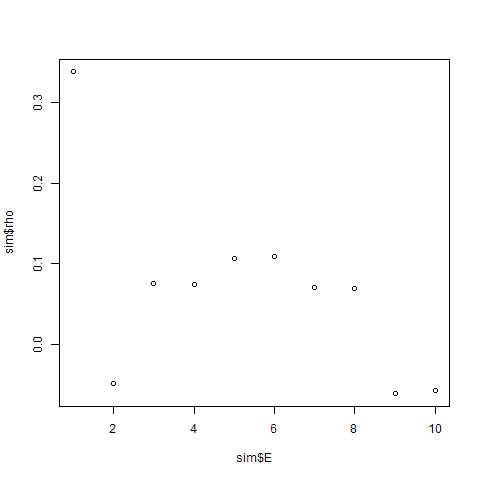

In [7]:
%%R -i df -o sim
sim<-simplex(df$anchovy)
plot(sim$E, sim$rho)

In [8]:
sim

,E,tau,tp,nn,num_pred,rho,mae,rmse,perc,p_val,const_pred_num_pred,const_pred_rho,const_pred_mae,const_pred_rmse,const_pred_perc,const_p_val
1,1,1.0,1.0,2.0,77.0,0.338210,0.642123,1.103471,0.662338,0.001228,77.0,-0.328633,0.820346,1.640635,0.571429,0.998337
2,2,1.0,1.0,3.0,76.0,-0.048329,0.650374,1.184584,0.539474,0.660286,76.0,-0.328635,0.831114,1.651394,0.565789,0.998227
3,3,1.0,1.0,4.0,75.0,0.075989,0.577111,1.076599,0.586667,0.259130,75.0,-0.328636,0.842180,1.662366,0.560000,0.998110
4,4,1.0,1.0,5.0,74.0,0.074540,0.578761,1.074364,0.567568,0.264593,74.0,-0.328637,0.853560,1.673561,0.554054,0.997985
5,5,1.0,1.0,6.0,73.0,0.106453,0.561829,1.051894,0.657534,0.185652,73.0,-0.328638,0.865244,1.684985,0.547945,0.997852
6,6,1.0,1.0,7.0,72.0,0.109066,0.553597,1.047561,0.611111,0.181519,72.0,-0.328639,0.877237,1.696646,0.541667,0.997709
7,7,1.0,1.0,8.0,71.0,0.071012,0.563363,1.060147,0.577465,0.278747,71.0,-0.328641,0.889586,1.708552,0.535211,0.997557
8,8,1.0,1.0,9.0,70.0,0.069244,0.571165,1.064592,0.514286,0.285122,70.0,-0.328642,0.902263,1.720713,0.528571,0.997395
9,9,1.0,1.0,10.0,69.0,-0.061204,0.576593,1.095882,0.565217,0.690704,69.0,-0.328644,0.915335,1.733137,0.521739,0.997221
10,10,1.0,1.0,11.0,68.0,-0.057675,0.593463,1.100731,0.558824,0.679217,68.0,-0.328643,0.928635,1.745833,0.529412,0.997036
